In [1]:
import sys, os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# import pickle as pk
import numpy as np
import torch
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
print(device)
dev = torch.device(device)
import torch.optim as optim
import sys, os
from tqdm import tqdm

import yaml
import matplotlib
import matplotlib.pyplot as pl
pl.rc('text', usetex=True)
# Palatino
pl.rc('font', family='DejaVu Sans')
%matplotlib inline
import yaml


# autoreload modules
%load_ext autoreload
%autoreload 2

import matplotlib
%matplotlib inline



cuda


In [2]:
from tqdm import tqdm
import pickle as pk
# ldir_stats = '/mnt/home/spandey/ceph/CHARM/data/summary_stats_charm_truth_nsubv_vel_10k/'
ldir_stats = '/mnt/home/spandey/ceph/CHARM/data/summary_stats_charm_truth_nsubv_vel_10k/'
isim_array = np.arange(1800,2000)
# isim_array = np.arange(0,)
pos = 'rsd'
for ji in tqdm(range(len(isim_array))):
    isim = isim_array[ji]
    try:
        saved_j = pk.load(open(ldir_stats + '/summary_stats_weighted_rsd_' + str(isim) + '_nbar_4en4.pk', 'rb'))    
        # saved_j = pk.load(open(ldir_stats + '/summary_stats_weighted_rsd_' + str(isim) + '_lgMmin_13p0.pk', 'rb'))            
        if ji == 0:
            Pk_mock_all = saved_j[pos + '_Pk_mock_weighted'][None,:,:]
            Pk_truth_all = saved_j[pos + '_Pk_truth_weighted'][None,:,:]            

            Bk_mock_lowk_all = saved_j[pos + '_Bk_mock_k0p06_weighted'][None,:]
            # Bk_mock_highk_all = saved_j['Bk_mock_k0p3_weighted'][None,:]
            Bk_mock_highk_all = saved_j[pos + '_Bk_mock_k0p2_weighted'][None,:]

            Bk_truth_lowk_all = saved_j[pos + '_Bk_truth_k0p06_weighted'][None,:]
            # Bk_truth_highk_all = saved_j['Bk_truth_k0p3_weighted'][None,:]
            Bk_truth_highk_all = saved_j[pos + '_Bk_truth_k0p2_weighted'][None,:]

            # wavelet_s0_mock_all = saved_j['s0_mock_weighted'][None,:]
            # wavelet_s0_truth_all = saved_j['s0_truth_weighted'][None,:]

            wavelet_s0_mock_all = saved_j[pos + '_s0_mock_weighted'][None,:]
            wavelet_s0_truth_all = saved_j[pos + 's0_truth_weighted'][None,:]

            wavelet_s1_mock_all = saved_j[pos + '_s1_mock_weighted'][None,:]
            wavelet_s1_truth_all = saved_j[pos + 's1_truth_weighted'][None,:]

            wavelet_s2_mock_all = saved_j[pos + '_s2_mock_weighted'][None,:]
            wavelet_s2_truth_all = saved_j[pos + 's2_truth_weighted'][None,:]


            cosmo_all = saved_j['cosmo'][None, :]


        else:
            Pk_mock_all = np.concatenate((Pk_mock_all, saved_j[pos + '_Pk_mock_weighted'][None,:,:]), axis=0)
            Pk_truth_all = np.concatenate((Pk_truth_all, saved_j[pos + '_Pk_truth_weighted'][None,:,:]), axis=0)

            Bk_mock_lowk_all = np.concatenate((Bk_mock_lowk_all, saved_j[pos + '_Bk_mock_k0p06_weighted'][None,:]), axis=0)
            # Bk_mock_highk_all = np.concatenate((Bk_mock_highk_all, saved_j['Bk_mock_k0p3_weighted'][None,:]), axis=0)
            Bk_mock_highk_all = np.concatenate((Bk_mock_highk_all, saved_j[pos + '_Bk_mock_k0p2_weighted'][None,:]), axis=0)

            Bk_truth_lowk_all = np.concatenate((Bk_truth_lowk_all, saved_j[pos + '_Bk_truth_k0p06_weighted'][None,:]), axis=0)
            # Bk_truth_highk_all = np.concatenate((Bk_truth_highk_all, saved_j['Bk_truth_k0p3_weighted'][None,:]), axis=0)
            Bk_truth_highk_all = np.concatenate((Bk_truth_highk_all, saved_j[pos + '_Bk_truth_k0p2_weighted'][None,:]), axis=0)

            # wavelet_s0_mock_all = np.concatenate((wavelet_s0_mock_all, saved_j['s0_mock_weighted'][None,:]), axis=0)
            # wavelet_s0_truth_all = np.concatenate((wavelet_s0_truth_all, saved_j['s0_truth_weighted'][None,:]), axis=0)

            wavelet_s0_mock_all = np.concatenate((wavelet_s0_mock_all, saved_j[pos + '_s0_mock_weighted'][None,:]), axis=0)
            wavelet_s0_truth_all = np.concatenate((wavelet_s0_truth_all, saved_j[pos + 's0_truth_weighted'][None,:]), axis=0)

            wavelet_s1_mock_all = np.concatenate((wavelet_s1_mock_all, saved_j[pos + '_s1_mock_weighted'][None,:]), axis=0)
            wavelet_s1_truth_all = np.concatenate((wavelet_s1_truth_all, saved_j[pos + 's1_truth_weighted'][None,:]), axis=0)

            wavelet_s2_mock_all = np.concatenate((wavelet_s2_mock_all, saved_j[pos + '_s2_mock_weighted'][None,:]), axis=0)
            wavelet_s2_truth_all = np.concatenate((wavelet_s2_truth_all, saved_j[pos + 's2_truth_weighted'][None,:]), axis=0)


            cosmo_all = np.concatenate((cosmo_all, saved_j['cosmo'][None, :]), axis=0)


    except Exception as e:
        # print(e)
        pass


wavelet_mock_all = np.concatenate((wavelet_s0_mock_all, wavelet_s1_mock_all, wavelet_s2_mock_all), axis=1)
wavelet_truth_all = np.concatenate((wavelet_s0_truth_all, wavelet_s1_truth_all, wavelet_s2_truth_all), axis=1)



  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:04<00:00, 41.00it/s]


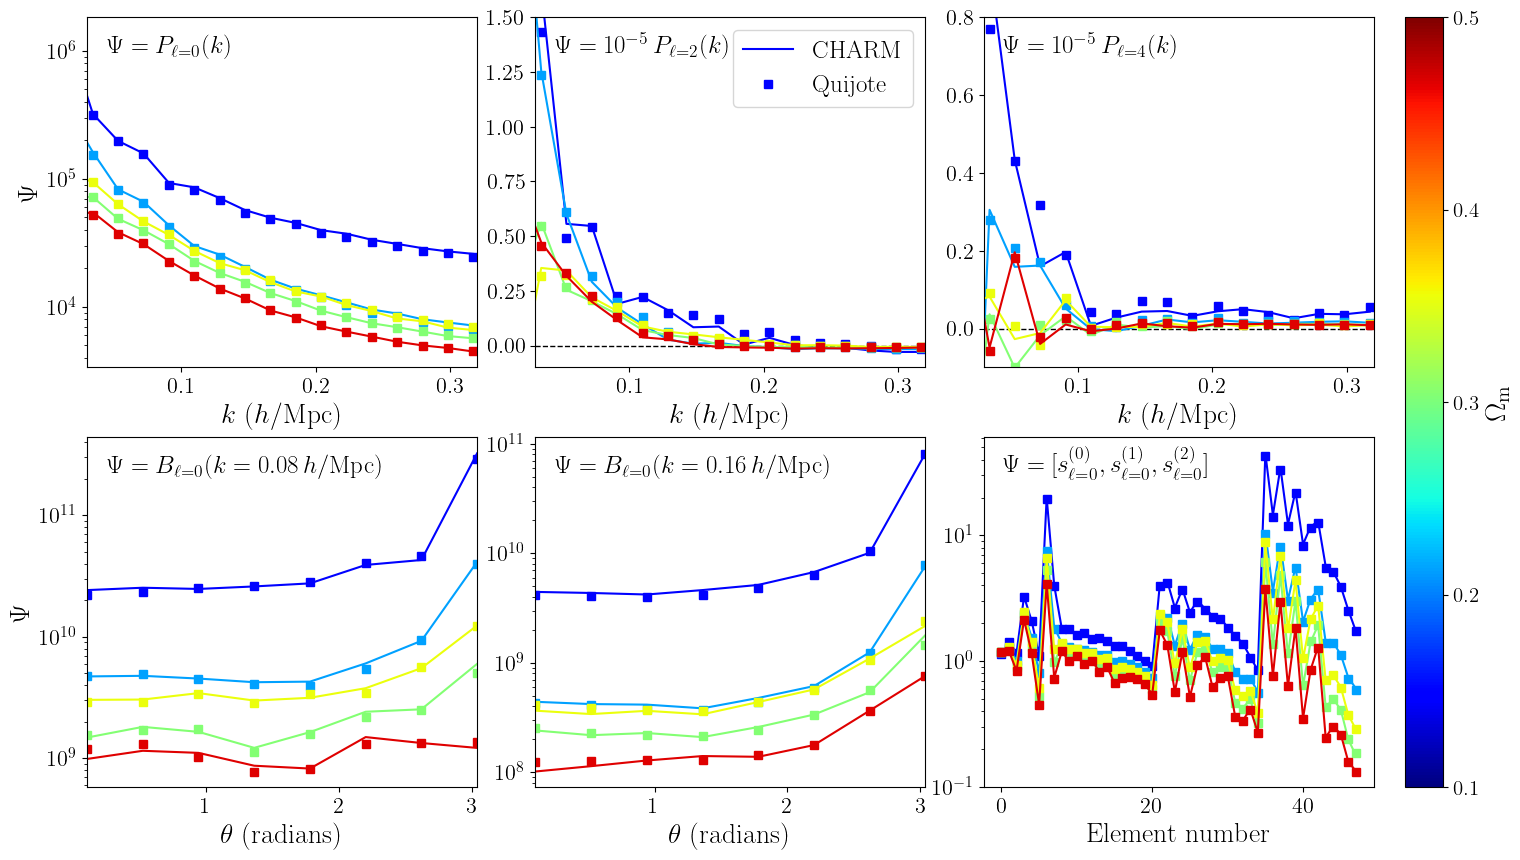

In [3]:
# indsel = np.arange(0, Pk_mock_all.shape[0], 1)
sig8_all = cosmo_all[:,0]
argsort_sig8 = np.argsort(sig8_all)
# sig8_all[argsort_sig8]
indsel = np.array([23,49, 101, 123, 175])
# ind_plot = argsort_sig8[25,75, 100, 125, 175]
# sig8_all[argsort_sig8]
indsel_plot = argsort_sig8[indsel]

# indsel = np.arange(0, Pk_mock_all.shape[0], 1)

from matplotlib import cm

#normalize item number values to colormap
# norm = matplotlib.colors.Normalize(vmin=0.6, vmax=1.0)
norm = matplotlib.colors.Normalize(vmin=0.1, vmax=0.5)

fig, axes_all = pl.subplots(2, 3, figsize=(20, 10))
# reduce the spacing between panels:
pl.subplots_adjust(wspace=0.15, hspace=0.2)


for j1 in range(2):
    axes = axes_all[j1]
    for i in range(3):
        # axes[i].axhline(1, color='k', ls='--', lw=2.0)
        if j1 == 0:

            for count, ji in enumerate(indsel_plot):
                sigma8_ji = cosmo_all[ji][0]
                color_ji = cm.jet(norm(sigma8_ji)) 
                # axes[i].plot(saved_j[pos + '_k_Pk_weighted'], Pk_mock_all[ji,:, i]/Pk_truth_all[j,:, i], color=color_ji, alpha=0.1)
                if i == 0:
                    axes[i].plot(saved_j[pos + '_k_Pk_weighted'], Pk_mock_all[ji,:, i], ls='-', color=color_ji, alpha=1.0, label='CHARM')            
                    axes[i].plot(saved_j[pos + '_k_Pk_weighted'], Pk_truth_all[ji,:, i], ls='', marker='s', color=color_ji, label='Quijote')            
                else:
                    axes[i].plot(saved_j[pos + '_k_Pk_weighted'], Pk_mock_all[ji,:, i]/1e5, ls='-', color=color_ji, alpha=1.0, label='CHARM')            
                    axes[i].plot(saved_j[pos + '_k_Pk_weighted'], Pk_truth_all[ji,:, i]/1e5, ls='', marker='s', color=color_ji, label='Quijote')            

                if count == 0:
                    # axes[i].fill_between(saved_j['k_Pk_weighted'], 1-Pk_truth_all_fid_ratio_std, 1+Pk_truth_all_fid_ratio_std, alpha=0.2, color='k')
                    # axes[i].set_xscale('log')
                    # if i == 0:
                    #     axes[i].set_ylim(0.4, 1.6)     
                    # else:
                    #     axes[i].set_ylim(-4.0, 6.0)     
                    axes[i].set_xlim(0.03, 0.32)        
                    # axes[i].set_xticks([0.03, 0.1, 0.2, 0.3], ['0.03', '0.1', '0.2', '0.3'])    
                    # axes[i].set_xticks([])
                    axes[i].set_xlabel(r'$k$  ($h$/Mpc)', size=20)

                    if i == 0:
                        axes[i].set_yscale('log')
                        # axes[i].legend(loc='upper right', fontsize=18)
                        label = r'$\Psi = P_{\ell = 0}(k)$'
                    if i == 1:
                        axes[i].set_ylim(-0.1, 1.5)
                        # axes[i].set_yscale('log')
                        axes[i].legend(loc='upper right', fontsize=18)
                        axes[i].axhline(0, color='k', ls='--', lw=1.0)
                        # axes[i].set_ylim(-1e4, 2e5)
                        label = r'$\Psi = 10^{-5} \, P_{\ell = 2}(k)$'
                    if i == 2:
                        axes[i].set_ylim(-0.1, 0.8)
                        axes[i].axhline(0, color='k', ls='--', lw=1.0)
                        # axes[i].set_ylim(-1e4, 2e5)
                        label = r'$\Psi = 10^{-5} \, P_{\ell = 4}(k)$'
                    
                    axes[i].text(0.05, 0.9, label, transform=axes[i].transAxes, fontsize=18)
                    if i == 0:
                        axes[i].set_ylabel(r'$\Psi$', size=20)
                        # axes[i].set_ylabel(r'$\Psi_{\rm CHARM}/\Psi_{\rm Quijote}$', size=20)


                
        if j1 == 1:
            if i == 0:
                for count, ji in enumerate(indsel_plot):           
                    # sigma8_ji = cosmo_all[ji][-1]
                    sigma8_ji = cosmo_all[ji][0]
                    color_ji = cm.jet(norm(sigma8_ji)) 

                    # axes[i].plot(saved_j['theta'], Bk_mock_lowk_all[j,:]/Bk_truth_lowk_all[j,:], color=color_ji, alpha=0.1)
                    axes[i].plot(saved_j['theta'], Bk_mock_lowk_all[ji,:], ls='-', color=color_ji, alpha=1.0)
                    axes[i].plot(saved_j['theta'], Bk_truth_lowk_all[ji,:], color=color_ji, ls='', marker='s',alpha=1.0)                        
                    if count == 0:   
                        axes[i].set_yscale('log')         
                        # axes[i].fill_between(saved_j['theta'], 1-Bk_truth_lowk_all_fid_ratio_std, 1+Bk_truth_lowk_all_fid_ratio_std, alpha=0.2, color='k')
                        # axes[i].set_ylim(0.4, 1.6)      
                        axes[i].set_xlim(0.1, 3.04)            
                        axes[i].set_xlabel(r'$\theta$ (radians)', size=20)

                        # label = r'$\Psi = $ Bispectrum' + '\n' +  r'($k=0.06$ $h/$Mpc)'
                        label = r'$\Psi = B_{\ell=0}(k=0.08 \, h/{\rm Mpc})$'                
                        axes[i].text(0.05, 0.9, label, transform=axes[i].transAxes, fontsize=18)
                        if i == 0:
                            # axes[i].set_ylabel(r'$\Psi_{\rm CHARM}/\Psi_{\rm Quijote}$', size=20)
                            axes[i].set_ylabel(r'$\Psi$', size=20)
            if i == 1:
                for count, ji in enumerate(indsel_plot):          
                    # sigma8_ji = cosmo_all[ji][-1]
                    sigma8_ji = cosmo_all[ji][0]
                    color_ji = cm.jet(norm(sigma8_ji)) 

                    # axes[i].plot(saved_j['theta'], Bk_mock_highk_all[j,:]/Bk_truth_highk_all[j,:], color=color_ji, alpha=0.1)
                    axes[i].plot(saved_j['theta'], Bk_mock_highk_all[ji,:], ls='-', color=color_ji, alpha=1.0)
                    axes[i].plot(saved_j['theta'], Bk_truth_highk_all[ji,:], color=color_ji, ls='', marker='s',alpha=1.0)


                    if count == 0:
                        axes[i].set_yscale('log')
                        # axes[i].fill_between(saved_j['theta'], 1-Bk_truth_highk_all_fid_ratio_std, 1+Bk_truth_highk_all_fid_ratio_std, alpha=0.2, color='k')
                        # axes[i].set_ylim(0.4, 1.6)       
                        axes[i].set_xlim(0.1, 3.04)                
                        axes[i].set_xlabel(r'$\theta$ (radians)', size=20)

                        # label = r'$\Psi = $ Bispectrum' + '\n' +  r'($k=0.2$ $h/$Mpc)'
                        label = r'$\Psi = B_{\ell=0}(k=0.16 \, h/{\rm Mpc})$'                
                        axes[i].text(0.05, 0.9, label, transform=axes[i].transAxes, fontsize=18)


            if i == 2:
                for count, ji in enumerate(indsel_plot):          
                    # sigma8_ji = cosmo_all[ji][-1]
                    sigma8_ji = cosmo_all[ji][0]
                    color_ji = cm.jet(norm(sigma8_ji)) 
                    ds_fac = 5
                    # axes[i].plot(np.arange(wavelet_s0_mock_all.shape[1]), wavelet_s0_mock_all[j,:]/wavelet_s0_truth_all[j,:], 'b', alpha=0.1)
                    # axes[i].plot(np.arange(wavelet_mock_all.shape[1]), wavelet_mock_all[j,:]/wavelet_truth_all[j,:], color=color_ji, alpha=0.1)            
                    axes[i].plot(np.arange(wavelet_mock_all[:,::ds_fac].shape[1]), wavelet_mock_all[ji,::ds_fac], ls='-', color=color_ji, alpha=1.0)            
                    axes[i].plot(np.arange(wavelet_mock_all[:,::ds_fac].shape[1]), wavelet_truth_all[ji,::ds_fac], color=color_ji,ls='', marker='s', alpha=1.0)            

                    if count == 0:
                        axes[i].set_yscale('log')
                        # axes[i].fill_between(np.arange(wavelet_s0_mock_all.shape[1]), 1-wavelet_s0_truth_all_fid_ratio_std, 1+wavelet_s0_truth_all_fid_ratio_std, alpha=0.2, color='k')
                        # axes[i].set_ylim(0.4, 1.6)       
                        # axes[i].set_xlim(0, 230)             
                        axes[i].set_xlabel('Element number', size=20)


                        label = r'$\Psi = [s_{\ell=0}^{(0)},s_{\ell=0}^{(1)},s_{\ell=0}^{(2)}]$'
                        axes[i].text(0.05, 0.9, label, transform=axes[i].transAxes, fontsize=18)



        axes[i].tick_params(axis='both', which='major', labelsize=16)
        axes[i].tick_params(axis='both', which='minor', labelsize=16)

# cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.jet), ax=axes_all, label=r'$\sigma_8$', pad=0.02)
# # set labelsize and colorbar location:
# # cbar = ax.collections[0].colorbar
# cbar.ax.tick_params(labelsize=15)
# cbar.set_label(r'$\sigma_8$', size=21)
# cbar.set_ticks(np.arange(0.6, 1.01, 0.1))

cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.jet), ax=axes_all, label=r'$\sigma_8$', pad=0.02)
# set labelsize and colorbar location:
# cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
# cbar.set_label(r'$\sigma_8$', size=21)
cbar.set_label(r'$\Omega_{\rm m}$', size=21)
# cbar.set_ticks(np.arange(0.6, 1.01, 0.1))
cbar.set_ticks(np.arange(0.1, 0.51, 0.1))
    # 
fig.savefig('/mnt/home/spandey/ceph/CHARM/results/paper_plots/stat_pred_resid_rsdspace_halos_v2.pdf', bbox_inches='tight')

# fig.savefig('/mnt/home/spandey/ceph/CHARM/results/stat_pred_resid_v2.pdf', bbox_inches='tight')
# fig.savefig('/mnt/home/spandey/ceph/CHARM/results/paper_plots/stat_pred_resid_rsdspace_halos.pdf', bbox_inches='tight')




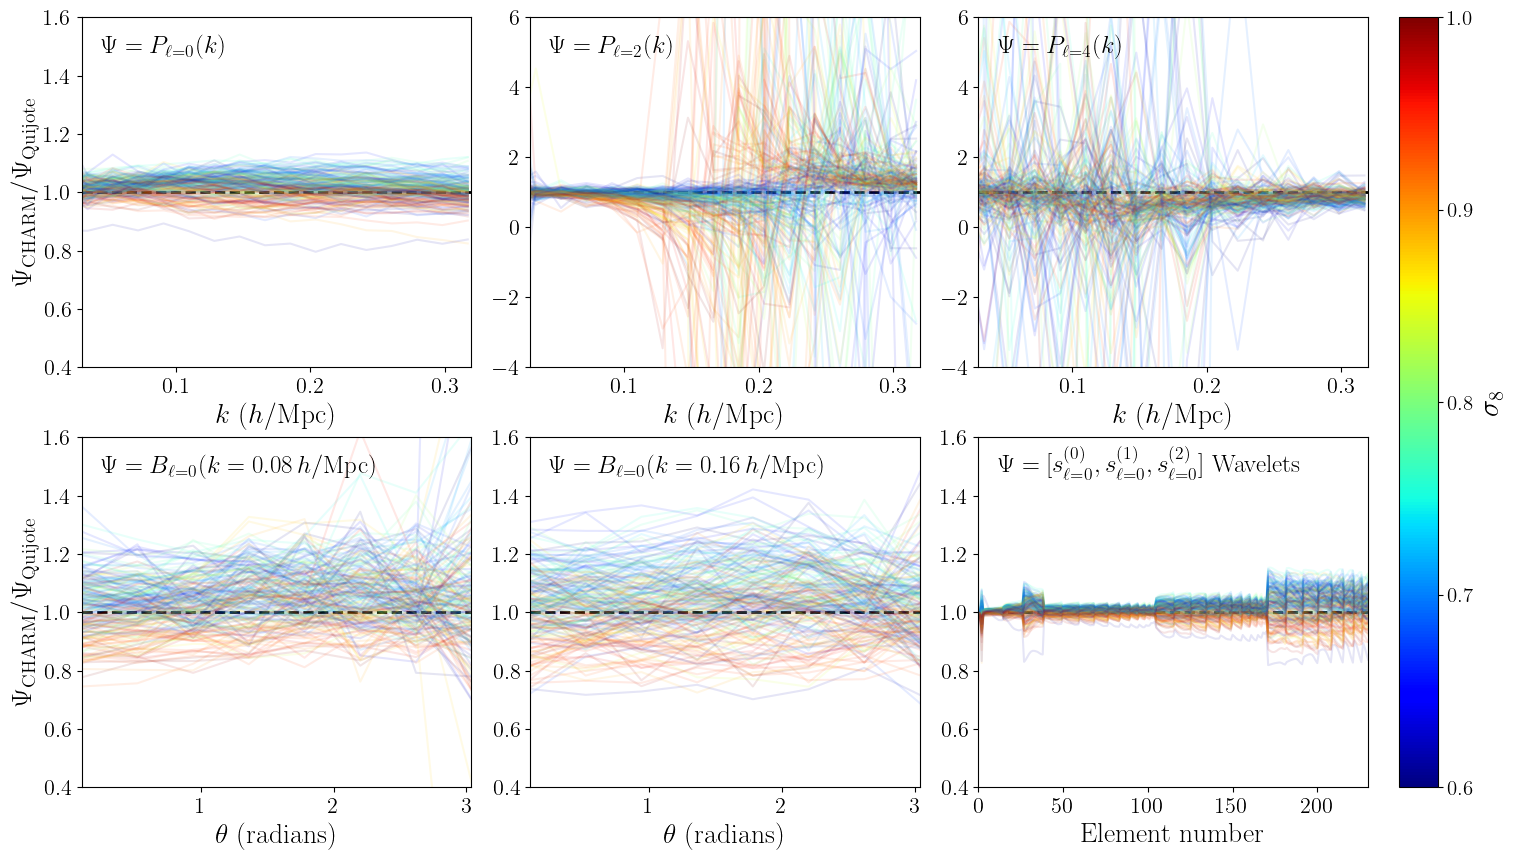

In [4]:
indsel = np.arange(0, Pk_mock_all.shape[0], 1)

from matplotlib import cm

#normalize item number values to colormap
norm = matplotlib.colors.Normalize(vmin=0.6, vmax=1.0)

fig, axes_all = pl.subplots(2, 3, figsize=(20, 10))
# reduce the spacing between panels:
pl.subplots_adjust(wspace=0.15, hspace=0.2)


for j1 in range(2):
    axes = axes_all[j1]
    for i in range(3):
        axes[i].axhline(1, color='k', ls='--', lw=2.0)
        if j1 == 0:

            for ji, j in enumerate(indsel):
                sigma8_ji = cosmo_all[ji][-1]
                color_ji = cm.jet(norm(sigma8_ji)) 
                axes[i].plot(saved_j[pos + '_k_Pk_weighted'], Pk_mock_all[j,:, i]/Pk_truth_all[j,:, i], color=color_ji, alpha=0.1)
                if ji == 0:
                    # axes[i].fill_between(saved_j['k_Pk_weighted'], 1-Pk_truth_all_fid_ratio_std, 1+Pk_truth_all_fid_ratio_std, alpha=0.2, color='k')
                    # axes[i].set_xscale('log')
                    if i == 0:
                        axes[i].set_ylim(0.4, 1.6)     
                    else:
                        axes[i].set_ylim(-4.0, 6.0)     
                    axes[i].set_xlim(0.03, 0.32)        
                    # axes[i].set_xticks([0.03, 0.1, 0.2, 0.3], ['0.03', '0.1', '0.2', '0.3'])    
                    # axes[i].set_xticks([])
                    axes[i].set_xlabel(r'$k$  ($h$/Mpc)', size=20)

                    if i == 0:
                        label = r'$\Psi = P_{\ell = 0}(k)$'
                    if i == 1:
                        label = r'$\Psi = P_{\ell = 2}(k)$'
                    if i == 2:
                        label = r'$\Psi = P_{\ell = 4}(k)$'
                    
                    axes[i].text(0.05, 0.9, label, transform=axes[i].transAxes, fontsize=18)
                    if i == 0:
                        axes[i].set_ylabel(r'$\Psi_{\rm CHARM}/\Psi_{\rm Quijote}$', size=20)

                
        if j1 == 1:
            if i == 0:
                for ji, j in enumerate(indsel):
                    sigma8_ji = cosmo_all[ji][-1]
                    color_ji = cm.jet(norm(sigma8_ji)) 

                    axes[i].plot(saved_j['theta'], Bk_mock_lowk_all[j,:]/Bk_truth_lowk_all[j,:], color=color_ji, alpha=0.1)
                    if ji == 0:            
                        # axes[i].fill_between(saved_j['theta'], 1-Bk_truth_lowk_all_fid_ratio_std, 1+Bk_truth_lowk_all_fid_ratio_std, alpha=0.2, color='k')
                        axes[i].set_ylim(0.4, 1.6)      
                        axes[i].set_xlim(0.1, 3.04)            
                        axes[i].set_xlabel(r'$\theta$ (radians)', size=20)

                        # label = r'$\Psi = $ Bispectrum' + '\n' +  r'($k=0.06$ $h/$Mpc)'
                        label = r'$\Psi = B_{\ell=0}(k=0.08 \, h/{\rm Mpc})$'                
                        axes[i].text(0.05, 0.9, label, transform=axes[i].transAxes, fontsize=18)
                        if i == 0:
                            axes[i].set_ylabel(r'$\Psi_{\rm CHARM}/\Psi_{\rm Quijote}$', size=20)


            if i == 1:
                for ji, j in enumerate(indsel):
                    sigma8_ji = cosmo_all[ji][-1]
                    color_ji = cm.jet(norm(sigma8_ji)) 

                    axes[i].plot(saved_j['theta'], Bk_mock_highk_all[j,:]/Bk_truth_highk_all[j,:], color=color_ji, alpha=0.1)
                    if ji == 0:
                        # axes[i].fill_between(saved_j['theta'], 1-Bk_truth_highk_all_fid_ratio_std, 1+Bk_truth_highk_all_fid_ratio_std, alpha=0.2, color='k')
                        axes[i].set_ylim(0.4, 1.6)       
                        axes[i].set_xlim(0.1, 3.04)                
                        axes[i].set_xlabel(r'$\theta$ (radians)', size=20)

                        # label = r'$\Psi = $ Bispectrum' + '\n' +  r'($k=0.2$ $h/$Mpc)'
                        label = r'$\Psi = B_{\ell=0}(k=0.16 \, h/{\rm Mpc})$'                
                        axes[i].text(0.05, 0.9, label, transform=axes[i].transAxes, fontsize=18)


            if i == 2:
                for ji, j in enumerate(indsel):
                    sigma8_ji = cosmo_all[ji][-1]
                    color_ji = cm.jet(norm(sigma8_ji)) 

                    # axes[i].plot(np.arange(wavelet_s0_mock_all.shape[1]), wavelet_s0_mock_all[j,:]/wavelet_s0_truth_all[j,:], 'b', alpha=0.1)
                    axes[i].plot(np.arange(wavelet_mock_all.shape[1]), wavelet_mock_all[j,:]/wavelet_truth_all[j,:], color=color_ji, alpha=0.1)            
                    if ji == 0:
                        # axes[i].fill_between(np.arange(wavelet_s0_mock_all.shape[1]), 1-wavelet_s0_truth_all_fid_ratio_std, 1+wavelet_s0_truth_all_fid_ratio_std, alpha=0.2, color='k')
                        axes[i].set_ylim(0.4, 1.6)       
                        axes[i].set_xlim(0, 230)             
                        axes[i].set_xlabel('Element number', size=20)


                        label = r'$\Psi = [s_{\ell=0}^{(0)},s_{\ell=0}^{(1)},s_{\ell=0}^{(2)}]$ Wavelets'
                        axes[i].text(0.05, 0.9, label, transform=axes[i].transAxes, fontsize=18)



        axes[i].tick_params(axis='both', which='major', labelsize=16)
        axes[i].tick_params(axis='both', which='minor', labelsize=16)

cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.jet), ax=axes_all, label=r'$\sigma_8$', pad=0.02)
# set labelsize and colorbar location:
# cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r'$\sigma_8$', size=21)
cbar.set_ticks(np.arange(0.6, 1.01, 0.1))
    # 
# fig.savefig('/mnt/home/spandey/ceph/CHARM/results/stat_pred_resid_v2.pdf', bbox_inches='tight')
fig.savefig('/mnt/home/spandey/ceph/CHARM/results/paper_plots/stat_pred_resid_rsdspace_halos.pdf', bbox_inches='tight')




In [68]:
from tqdm import tqdm
import pickle as pk
import dill
ldir_stats = '/mnt/home/spandey/ceph/CHARM/data/summary_stats_galaxies_sigpos_8/'
pos = 'rsd'
isim_array = np.arange(1800,2000)
for ji in tqdm(range(len(isim_array))):
    isim = isim_array[ji]
    saved_j = pk.load(open(ldir_stats + '/Pk_Bk_galaxy_LH_' + str(isim) + '.dill', 'rb'))    
    # saved_w = pk.load(open(ldir_stats + '/wavelets_simbigsettings_galaxy_LH_' + str(isim) + '.dill', 'rb'))    
    saved_w = pk.load(open(ldir_stats + '/wavelets_galaxy_LH_' + str(isim) + '.dill', 'rb'))    
    ihod = 0
    if ji == 0:
        Pk_mock_ds = saved_j[pos + f'_Pk_mock_{ihod}'][:,:3][None,:]
        Pk_truth_ds = saved_j[pos + f'_Pk_truth_{ihod}'][:,:3][None,:]

        Bk_truth_k0p06 = saved_j[pos + f'_Bk_truth_0p08_{ihod}'][None,:]
        Bk_mock_k0p06 = saved_j[pos + f'_Bk_mock_0p08_{ihod}'][None,:]

        Bk_truth_k0p2 = saved_j[pos + f'_Bk_truth_0p16_{ihod}'][None,:]
        Bk_mock_k0p2 = saved_j[pos + f'_Bk_mock_0p16_{ihod}'][None,:]

        Bk_truth_k0p3 = saved_j[pos + f'_Bk_truth_0p32_{ihod}'][None,:]
        Bk_mock_k0p3 = saved_j[pos + f'_Bk_mock_0p32_{ihod}'][None,:]

        s0_mock = saved_w[pos + f'_s0_mock_{ihod}'][None,:]
        s0_truth = saved_w[pos + f'_s0_truth_{ihod}'][None,:]

        s1_mock = saved_w[pos + f'_s1_mock_{ihod}'][None,:]
        s1_truth = saved_w[pos + f'_s1_truth_{ihod}'][None,:]

        s2_mock = saved_w[pos + f'_s2_mock_{ihod}'][None,:]
        s2_truth = saved_w[pos + f'_s2_truth_{ihod}'][None,:]

        cosmo_all = np.array(list(saved_j[f'theta_cosmo_{ihod}'].values())[:-1])[None, :]

    else:
        Pk_mock_ds = np.concatenate((Pk_mock_ds, saved_j[pos + f'_Pk_mock_{ihod}'][:,:3][None,:]), axis=0)
        Pk_truth_ds = np.concatenate((Pk_truth_ds, saved_j[pos + f'_Pk_truth_{ihod}'][:,:3][None,:]), axis=0)

        Bk_truth_k0p06 = np.concatenate((Bk_truth_k0p06, saved_j[pos + f'_Bk_truth_0p08_{ihod}'][None,:]), axis=0)
        Bk_mock_k0p06 = np.concatenate((Bk_mock_k0p06, saved_j[pos + f'_Bk_mock_0p08_{ihod}'][None,:]), axis=0)

        Bk_truth_k0p2 = np.concatenate((Bk_truth_k0p2, saved_j[pos + f'_Bk_truth_0p16_{ihod}'][None,:]), axis=0)
        Bk_mock_k0p2 = np.concatenate((Bk_mock_k0p2, saved_j[pos + f'_Bk_mock_0p16_{ihod}'][None,:]), axis=0)

        Bk_truth_k0p3 = np.concatenate((Bk_truth_k0p3, saved_j[pos + f'_Bk_truth_0p32_{ihod}'][None,:]), axis=0)
        Bk_mock_k0p3 = np.concatenate((Bk_mock_k0p3, saved_j[pos + f'_Bk_mock_0p32_{ihod}'][None,:]), axis=0)

        s0_mock = np.concatenate((s0_mock, saved_w[pos + f'_s0_mock_{ihod}'][None,:]), axis=0)
        s0_truth = np.concatenate((s0_truth, saved_w[pos + f'_s0_truth_{ihod}'][None,:]), axis=0)

        s1_mock = np.concatenate((s1_mock, saved_w[pos + f'_s1_mock_{ihod}'][None,:]), axis=0)
        s1_truth = np.concatenate((s1_truth, saved_w[pos + f'_s1_truth_{ihod}'][None,:]), axis=0)

        s2_mock = np.concatenate((s2_mock, saved_w[pos + f'_s2_mock_{ihod}'][None,:]), axis=0)
        s2_truth = np.concatenate((s2_truth, saved_w[pos + f'_s2_truth_{ihod}'][None,:]), axis=0)

        cosmo_all = np.concatenate((cosmo_all, np.array(list(saved_j[f'theta_cosmo_{ihod}'].values())[:-1])[None, :]), axis=0)
    


  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:09<00:00, 22.10it/s]


In [69]:
Pk_mock_all = Pk_mock_ds
Pk_truth_all = Pk_truth_ds
wavelet_mock_all = np.concatenate((s0_mock, s1_mock, s2_mock), axis=1)
wavelet_truth_all = np.concatenate((s0_truth, s1_truth, s2_truth), axis=1)
Bk_mock_lowk_all = Bk_mock_k0p06
Bk_mock_highk_all = Bk_mock_k0p2
Bk_truth_lowk_all = Bk_truth_k0p06
Bk_truth_highk_all = Bk_truth_k0p2



In [70]:
# saved_j.keys()
Bk_truth_lowk_all.shape, Bk_truth_highk_all.shape


((200, 8), (200, 8))

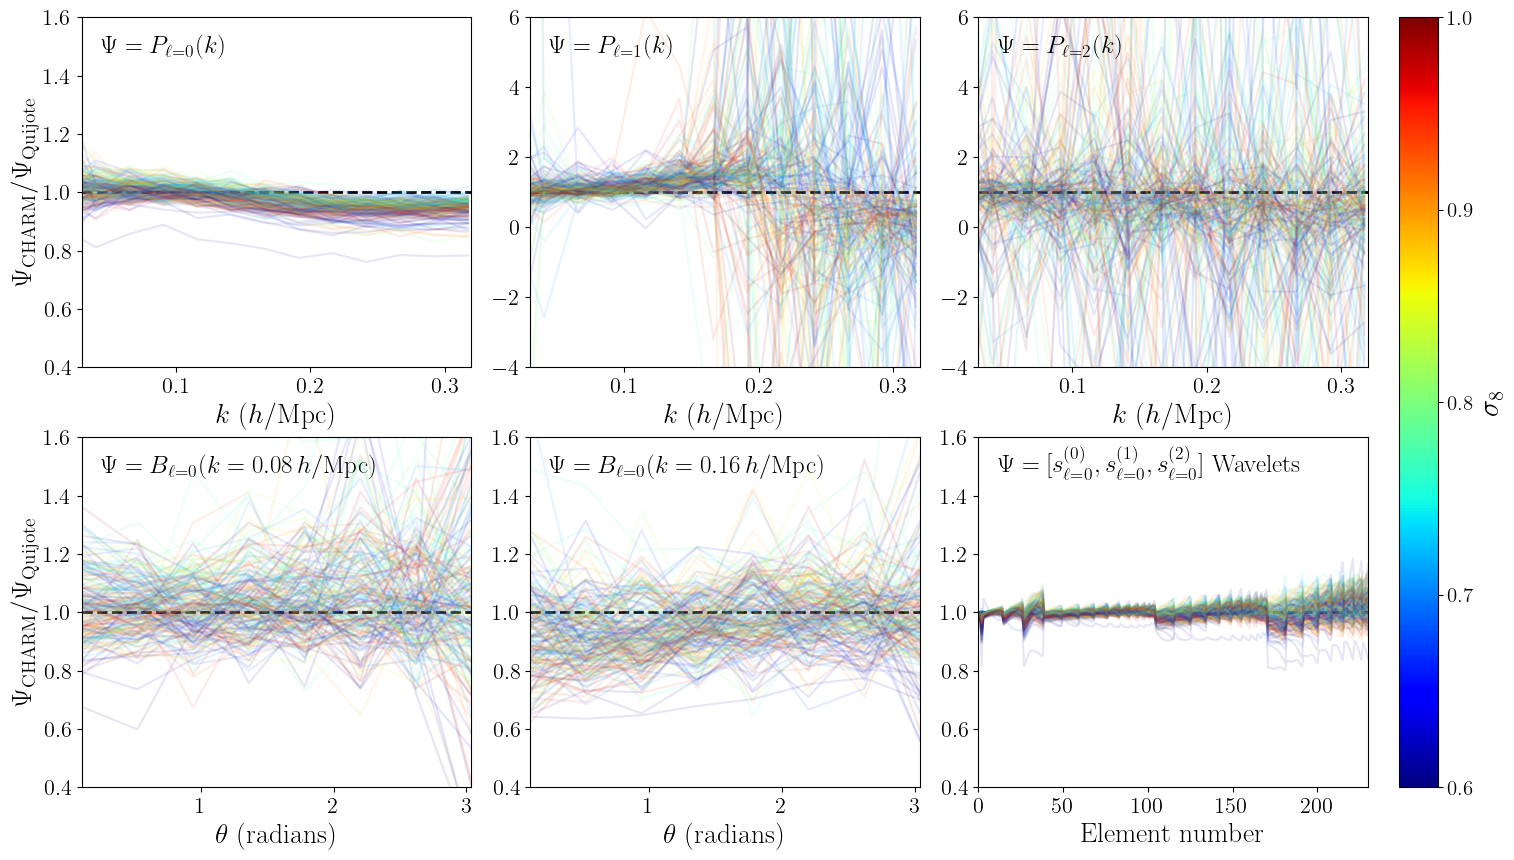

In [72]:
indsel = np.arange(0, Pk_mock_all.shape[0], 1)

from matplotlib import cm

#normalize item number values to colormap
norm = matplotlib.colors.Normalize(vmin=0.6, vmax=1.0)

fig, axes_all = pl.subplots(2, 3, figsize=(20, 10))
# reduce the spacing between panels:
pl.subplots_adjust(wspace=0.15, hspace=0.2)


for j1 in range(2):
    axes = axes_all[j1]
    for i in range(3):
        axes[i].axhline(1, color='k', ls='--', lw=2.0)
        if j1 == 0:

            for ji, j in enumerate(indsel):
                sigma8_ji = cosmo_all[ji][-1]
                color_ji = cm.jet(norm(sigma8_ji)) 
                axes[i].plot(saved_j[pos + '_k_Pk_0'], Pk_mock_all[j,:, i]/Pk_truth_all[j,:, i], color=color_ji, alpha=0.1)
                if ji == 0:
                    # axes[i].fill_between(saved_j['k_Pk_weighted'], 1-Pk_truth_all_fid_ratio_std, 1+Pk_truth_all_fid_ratio_std, alpha=0.2, color='k')
                    # axes[i].set_xscale('log')
                    if i == 0:
                        axes[i].set_ylim(0.4, 1.6)     
                    else:
                        axes[i].set_ylim(-4.0, 6.0)     
                    axes[i].set_xlim(0.03, 0.32)        
                    # axes[i].set_xticks([0.03, 0.1, 0.2, 0.3], ['0.03', '0.1', '0.2', '0.3'])    
                    # axes[i].set_xticks([])
                    axes[i].set_xlabel(r'$k$  ($h$/Mpc)', size=20)

                    if i == 0:
                        label = r'$\Psi = P_{\ell = 0}(k)$'
                    if i == 1:
                        label = r'$\Psi = P_{\ell = 1}(k)$'
                    if i == 2:
                        label = r'$\Psi = P_{\ell = 2}(k)$'
                    
                    axes[i].text(0.05, 0.9, label, transform=axes[i].transAxes, fontsize=18)
                    if i == 0:
                        axes[i].set_ylabel(r'$\Psi_{\rm CHARM}/\Psi_{\rm Quijote}$', size=20)

                
        if j1 == 1:
            if i == 0:
                for ji, j in enumerate(indsel):
                    sigma8_ji = cosmo_all[ji][-1]
                    color_ji = cm.jet(norm(sigma8_ji)) 

                    axes[i].plot(saved_j['theta_Bk_0'], Bk_mock_lowk_all[j,:]/Bk_truth_lowk_all[j,:], color=color_ji, alpha=0.1)
                    if ji == 0:            
                        # axes[i].fill_between(saved_j['theta'], 1-Bk_truth_lowk_all_fid_ratio_std, 1+Bk_truth_lowk_all_fid_ratio_std, alpha=0.2, color='k')
                        axes[i].set_ylim(0.4, 1.6)      
                        axes[i].set_xlim(0.1, 3.04)            
                        axes[i].set_xlabel(r'$\theta$ (radians)', size=20)

                        # label = r'$\Psi = $ Bispectrum' + '\n' +  r'($k=0.06$ $h/$Mpc)'
                        label = r'$\Psi = B_{\ell=0}(k=0.08 \, h/{\rm Mpc})$'                
                        axes[i].text(0.05, 0.9, label, transform=axes[i].transAxes, fontsize=18)
                        if i == 0:
                            axes[i].set_ylabel(r'$\Psi_{\rm CHARM}/\Psi_{\rm Quijote}$', size=20)


            if i == 1:
                for ji, j in enumerate(indsel):
                    sigma8_ji = cosmo_all[ji][-1]
                    color_ji = cm.jet(norm(sigma8_ji)) 

                    axes[i].plot(saved_j['theta_Bk_0'], Bk_mock_highk_all[j,:]/Bk_truth_highk_all[j,:], color=color_ji, alpha=0.1)
                    if ji == 0:
                        # axes[i].fill_between(saved_j['theta'], 1-Bk_truth_highk_all_fid_ratio_std, 1+Bk_truth_highk_all_fid_ratio_std, alpha=0.2, color='k')
                        axes[i].set_ylim(0.4, 1.6)       
                        axes[i].set_xlim(0.1, 3.04)                
                        axes[i].set_xlabel(r'$\theta$ (radians)', size=20)

                        # label = r'$\Psi = $ Bispectrum' + '\n' +  r'($k=0.2$ $h/$Mpc)'
                        label = r'$\Psi = B_{\ell=0}(k=0.16 \, h/{\rm Mpc})$'                
                        axes[i].text(0.05, 0.9, label, transform=axes[i].transAxes, fontsize=18)


            if i == 2:
                for ji, j in enumerate(indsel):
                    sigma8_ji = cosmo_all[ji][-1]
                    color_ji = cm.jet(norm(sigma8_ji)) 

                    # axes[i].plot(np.arange(wavelet_s0_mock_all.shape[1]), wavelet_s0_mock_all[j,:]/wavelet_s0_truth_all[j,:], 'b', alpha=0.1)
                    axes[i].plot(np.arange(wavelet_mock_all.shape[1]), wavelet_mock_all[j,:]/wavelet_truth_all[j,:], color=color_ji, alpha=0.1)            
                    if ji == 0:
                        # axes[i].fill_between(np.arange(wavelet_s0_mock_all.shape[1]), 1-wavelet_s0_truth_all_fid_ratio_std, 1+wavelet_s0_truth_all_fid_ratio_std, alpha=0.2, color='k')
                        axes[i].set_ylim(0.4, 1.6)       
                        axes[i].set_xlim(0, 230)             
                        axes[i].set_xlabel('Element number', size=20)


                        label = r'$\Psi = [s_{\ell=0}^{(0)},s_{\ell=0}^{(1)},s_{\ell=0}^{(2)}]$ Wavelets'
                        axes[i].text(0.05, 0.9, label, transform=axes[i].transAxes, fontsize=18)



        axes[i].tick_params(axis='both', which='major', labelsize=16)
        axes[i].tick_params(axis='both', which='minor', labelsize=16)

cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.jet), ax=axes_all, label=r'$\sigma_8$', pad=0.02)
# set labelsize and colorbar location:
# cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r'$\sigma_8$', size=21)
cbar.set_ticks(np.arange(0.6, 1.01, 0.1))
    # 
# fig.savefig('/mnt/home/spandey/ceph/CHARM/results/stat_pred_resid_v2.pdf', bbox_inches='tight')
fig.savefig('/mnt/home/spandey/ceph/CHARM/results/paper_plots/stat_pred_resid_rsdspace_galaxies.pdf', bbox_inches='tight')


